In [1]:
import tensorflow as tf
import numpy as np 
import cv2 
import os 
import PIL.Image as Image
import matplotlib.pylab as plt 
import tensorflow_hub as hub 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224,224,3))
])

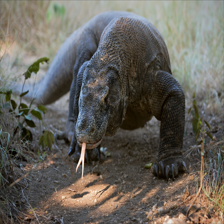

In [4]:
ImageSize= (224,224)
myImage = Image.open("komodo.jpg").resize(ImageSize)
myImage

In [5]:
myImage = np.array(myImage)/255


In [6]:
myImage[np.newaxis,...]

array([[[[0.41176471, 0.39607843, 0.35294118],
         [0.42745098, 0.42745098, 0.38823529],
         [0.4627451 , 0.46666667, 0.44313725],
         ...,
         [0.5254902 , 0.55686275, 0.56078431],
         [0.52156863, 0.55686275, 0.56078431],
         [0.48627451, 0.50196078, 0.49019608]],

        [[0.45098039, 0.43529412, 0.38039216],
         [0.47058824, 0.46666667, 0.41176471],
         [0.50196078, 0.50588235, 0.47058824],
         ...,
         [0.56470588, 0.6       , 0.59215686],
         [0.56470588, 0.60784314, 0.60392157],
         [0.53333333, 0.54901961, 0.53333333]],

        [[0.45098039, 0.43137255, 0.37254902],
         [0.4627451 , 0.45490196, 0.4       ],
         [0.48627451, 0.48235294, 0.43529412],
         ...,
         [0.55686275, 0.59215686, 0.57647059],
         [0.56470588, 0.59607843, 0.58431373],
         [0.52941176, 0.55294118, 0.51764706]],

        ...,

        [[0.23529412, 0.19607843, 0.13333333],
         [0.24705882, 0.20392157, 0.1372549 ]

In [7]:
predicted_label = classifier.predict(myImage[np.newaxis,...])

In [8]:
predicted_label

array([[ 0.3424239 ,  0.83559793, -0.25315094, ...,  0.19278702,
         0.06385638, -0.94859105]], dtype=float32)

In [9]:
predicted_label= np.argmax(predicted_label)
predicted_label

49

In [10]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[40:50]

['common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon']

In [11]:
image_labels[predicted_label]

'Komodo dragon'

In [12]:
data_dir = "/content/drive/MyDrive/animals"

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('/content/drive/MyDrive/animals')

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))+ len(list(data_dir.glob('*/*.jpeg')))+ len(list(data_dir.glob('*/*.png')))
image_count

489

In [15]:
animal_img_dict = {
    'Dog' : list(data_dir.glob('Dog/*')),
    'Cat': list(data_dir.glob('Cat/*')),
    'Tiger': list(data_dir.glob('Tiger/*')),
    'Rabbit': list(data_dir.glob('Rabbit/*'))
}

In [16]:
animal_label_dict = {
    'Dog': 0,
    'Cat': 1,
    'Tiger': 2,
    'Rabbit': 3
}

In [17]:
x,y = [], []

for animal_image, images in animal_img_dict.items():
    for image in images: 
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224,224))
        x.append(resized_img)
        y.append(animal_label_dict[animal_image])

x = np.array(x);
y = np.array(y);

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
x_train = x_train/255
x_test= x_test/255


In [20]:
model = tf.keras.models.Sequential()

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [22]:
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))


In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(4))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 86528)            

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
11/11 [==============================] - 21s 2s/step - loss: 3.0769 - accuracy: 0.2711 - val_loss: 1.4369 - val_accuracy: 0.2857
Epoch 2/10
11/11 [==============================] - 19s 2s/step - loss: 1.3536 - accuracy: 0.3120 - val_loss: 1.3573 - val_accuracy: 0.3197
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 1.2259 - accuracy: 0.4606 - val_loss: 1.1020 - val_accuracy: 0.4830
Epoch 4/10
11/11 [==============================] - 19s 2s/step - loss: 0.9816 - accuracy: 0.5802 - val_loss: 1.0989 - val_accuracy: 0.4762
Epoch 5/10
11/11 [==============================] - 19s 2s/step - loss: 0.8271 - accuracy: 0.6414 - val_loss: 0.9226 - val_accuracy: 0.5782
Epoch 6/10
11/11 [==============================] - 19s 2s/step - loss: 0.6132 - accuracy: 0.7464 - val_loss: 0.8195 - val_accuracy: 0.6327
Epoch 7/10
11/11 [==============================] - 19s 2s/step - loss: 0.5320 - accuracy: 0.7755 - val_loss: 0.8811 - val_accuracy: 0.6395
Epoch 8/10
11/11 [==

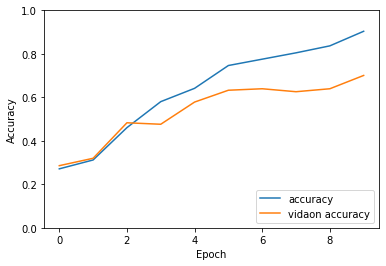

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='vidaon accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [27]:
test_loss, test_acc = model.evaluate(x_test,  y_test)


5/5 [==============================] - 2s 516ms/step - loss: 0.8993 - accuracy: 0.7007


In [28]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)



In [29]:
num_of_animals = 4

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_animals)
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
11/11 [==============================] - 15s 1s/step - loss: 0.9354 - accuracy: 0.6822 - val_loss: 0.3703 - val_accuracy: 0.9592
Epoch 2/10
11/11 [==============================] - 11s 1s/step - loss: 0.2094 - accuracy: 0.9767 - val_loss: 0.1391 - val_accuracy: 0.9932
Epoch 3/10
11/11 [==============================] - 11s 1s/step - loss: 0.0857 - accuracy: 0.9913 - val_loss: 0.1012 - val_accuracy: 0.9864
Epoch 4/10
11/11 [==============================] - 11s 1s/step - loss: 0.0504 - accuracy: 0.9971 - val_loss: 0.0789 - val_accuracy: 0.9864
Epoch 5/10
11/11 [==============================] - 11s 1s/step - loss: 0.0354 - accuracy: 0.9971 - val_loss: 0.0692 - val_accuracy: 0.9864
Epoch 6/10
11/11 [==============================] - 11s 1s/step - loss: 0.0276 - accuracy: 0.9971 - val_loss: 0.0667 - val_accuracy: 0.9864
Epoch 7/10
11/11 [==============================] - 11s 1s/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9864
Epoch 8/10
11/11 [==

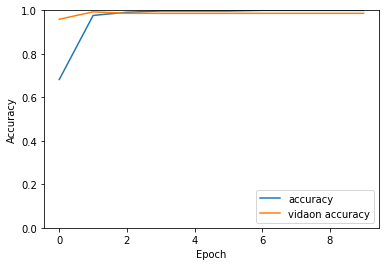

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='vidaon accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [35]:
y_pred = np.argmax(probability_model.predict(x_test),axis=1)
y_pred

array([2, 0, 3, 2, 2, 2, 0, 3, 0, 0, 2, 0, 0, 3, 0, 1, 2, 1, 0, 1, 3, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 1,
       3, 1, 0, 3, 3, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 3, 3, 2, 1, 3,
       1, 1, 2, 1, 3, 3, 0, 1, 2, 0, 2, 0, 0, 2, 2, 3, 1, 3, 2, 3, 3, 1,
       3, 0, 0, 2, 2, 1, 2, 3, 2, 0, 2, 1, 3, 2, 3, 2, 0, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 3, 2, 0, 3, 2, 0, 0, 3, 1, 3, 0, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 3, 0, 3, 2, 2, 3, 1])

In [36]:
y_test

array([2, 0, 3, 2, 2, 2, 0, 3, 0, 0, 2, 0, 0, 3, 0, 1, 2, 2, 0, 1, 3, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 1,
       3, 1, 0, 3, 3, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 3,
       1, 1, 2, 1, 3, 3, 0, 1, 2, 0, 2, 0, 0, 2, 2, 3, 1, 3, 2, 3, 3, 1,
       3, 0, 0, 2, 2, 1, 2, 3, 2, 0, 2, 1, 3, 2, 3, 2, 0, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 3, 2, 0, 3, 2, 0, 0, 3, 1, 3, 0, 2, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 3, 0, 3, 2, 2, 3, 1])

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[43,  0,  0,  0],
       [ 0, 33,  0,  0],
       [ 0,  1, 40,  1],
       [ 0,  0,  0, 29]])

In [38]:
class_names=['Dog', 'Cat', 'Tiger', 'Rabbit']

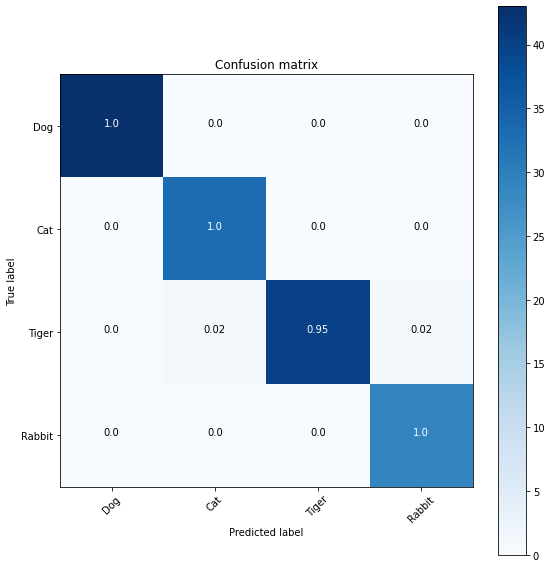

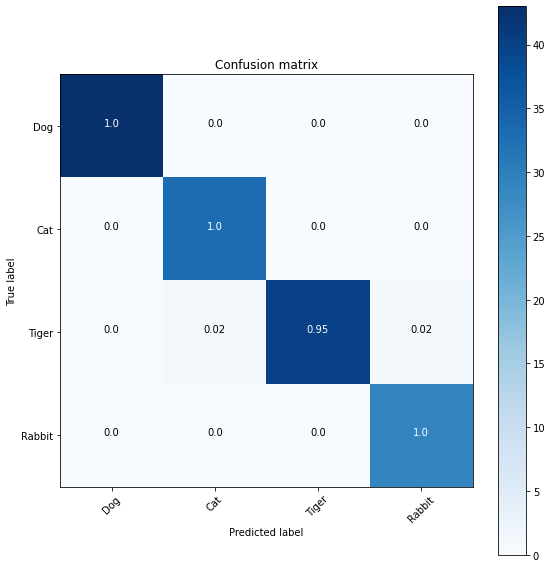

In [39]:

def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure


# In[34]:


import itertools
plot_confusion_matrix(cm,class_names)



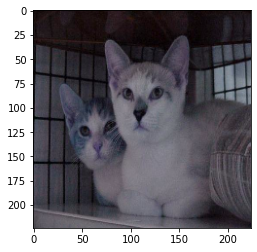

In [40]:
fileIdx= 31
plt.imshow(x_test[fileIdx])

In [41]:
result = probability_model.predict(np.array([x_test[fileIdx]]))
result = np.argmax(result)
result

1

In [42]:
class_names[result]

'Cat'

In [43]:
y_test[fileIdx]

1